In [17]:
'''
@Author: Viney Khaneja
@Date: 2022-05-20 08:25
@Last Modified by: Viney Khaneja
@Last Modified time: None
@Title : CPU Logs Problem Statement By PySpark
'''

from pyspark.sql import *
spark = SparkSession.builder.getOrCreate()
from pyspark.sql.functions import *


In [18]:
df_pyspark = spark.read.csv("/home/viney/Desktop/CFP_Python/PySpark_CPU_Logs_Problem/cpu_logs_db/*.csv", header=True,inferSchema=True)

In [19]:
df1 = df_pyspark.select(["user_name","DateTime","keyboard","mouse",'Cpu Count'])
df1.show()

+--------------------+-------------------+--------+------+---------+
|           user_name|           DateTime|keyboard| mouse|Cpu Count|
+--------------------+-------------------+--------+------+---------+
|  iamnzm@outlook.com|2019-09-19 08:40:02|     1.0|  32.0|        2|
|  iamnzm@outlook.com|2019-09-19 08:45:02|     0.0|   0.0|        2|
|  iamnzm@outlook.com|2019-09-19 08:50:01|     0.0|   0.0|        2|
|  iamnzm@outlook.com|2019-09-19 08:55:01|    11.0| 900.0|        2|
|  iamnzm@outlook.com|2019-09-19 09:00:01|     2.0|  25.0|        2|
|  iamnzm@outlook.com|2019-09-19 09:05:01|    37.0| 336.0|        2|
|deepshukla292@gma...|2019-09-19 09:05:01|     0.0|  55.0|        2|
|  iamnzm@outlook.com|2019-09-19 09:10:01|     0.0| 136.0|        2|
|deepshukla292@gma...|2019-09-19 09:10:01|     6.0|1112.0|        2|
|  iamnzm@outlook.com|2019-09-19 09:15:02|     0.0|  84.0|        2|
|deepshukla292@gma...|2019-09-19 09:15:02|     0.0| 357.0|        2|
|markfernandes66@g...|2019-09-19 0

In [20]:
df2 = df1.groupBy("user_name").count()
df2.show()

+--------------------+-----+
|           user_name|count|
+--------------------+-----+
|salinabodale73@gm...|  569|
|sharlawar77@gmail...|  580|
|rahilstar11@gmail...|  551|
|deepshukla292@gma...|  565|
|  iamnzm@outlook.com|  614|
|markfernandes66@g...|  508|
|damodharn21@gmail...|  253|
|bhagyashrichalke2...|  482|
+--------------------+-----+



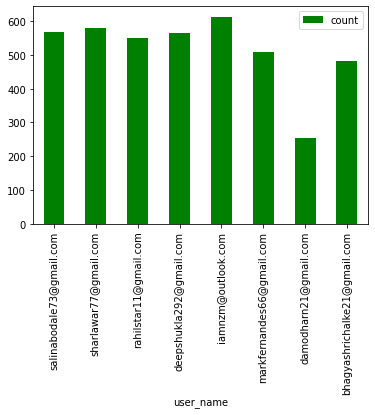

In [21]:
from matplotlib import pyplot as plt

try:
    pdf=df2.toPandas()
    pdf.plot.bar(x='user_name', y='count',color = 'g')
    plt.show()
except Exception as e:
    print(e)

In [22]:
df_pyspark.createOrReplaceTempView("tbl_working_counts")

# Users Count who are working i.e. keyboard & mouse is not zero and plotting the graph for same

In [23]:
df3=spark.sql("SELECT user_name FROM tbl_working_counts WHERE keyboard!=0 or mouse!=0").groupBy("user_name").count()
df3.show()

+--------------------+-----+
|           user_name|count|
+--------------------+-----+
|salinabodale73@gm...|  440|
|sharlawar77@gmail...|  457|
|rahilstar11@gmail...|  399|
|deepshukla292@gma...|  475|
|  iamnzm@outlook.com|  459|
|markfernandes66@g...|  389|
|damodharn21@gmail...|  191|
|bhagyashrichalke2...|  361|
+--------------------+-----+



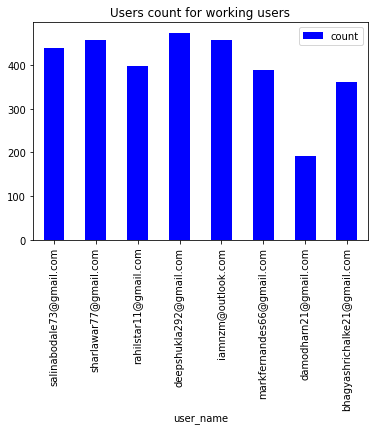

In [24]:
try:
    pdf1=df3.toPandas()
    pdf1.plot.bar(x='user_name', y='count',color = 'b')
    plt.title("Users count for working users")
    plt.show()
except Exception as e:
    print(e)

In [25]:
df3.createOrReplaceTempView("tbl_average_seconds")

In [26]:
df4=spark.sql("SELECT user_name,count,(count*5*60)/6 as avg_seconds FROM tbl_average_seconds")
df4.show()

+--------------------+-----+-----------+
|           user_name|count|avg_seconds|
+--------------------+-----+-----------+
|salinabodale73@gm...|  440|    22000.0|
|sharlawar77@gmail...|  457|    22850.0|
|rahilstar11@gmail...|  399|    19950.0|
|deepshukla292@gma...|  475|    23750.0|
|  iamnzm@outlook.com|  459|    22950.0|
|markfernandes66@g...|  389|    19450.0|
|damodharn21@gmail...|  191|     9550.0|
|bhagyashrichalke2...|  361|    18050.0|
+--------------------+-----+-----------+



In [27]:
highest_avg_hour = df4.withColumn("average_hours", concat(floor(col("avg_seconds") / 3600), lit(":"),floor(col("avg_seconds") % 86400 % 3600 / 60), lit(""),)).drop("avg_seconds")
highest_avg_hour.show()

+--------------------+-----+-------------+
|           user_name|count|average_hours|
+--------------------+-----+-------------+
|salinabodale73@gm...|  440|          6:6|
|sharlawar77@gmail...|  457|         6:20|
|rahilstar11@gmail...|  399|         5:32|
|deepshukla292@gma...|  475|         6:35|
|  iamnzm@outlook.com|  459|         6:22|
|markfernandes66@g...|  389|         5:24|
|damodharn21@gmail...|  191|         2:39|
|bhagyashrichalke2...|  361|          5:0|
+--------------------+-----+-------------+



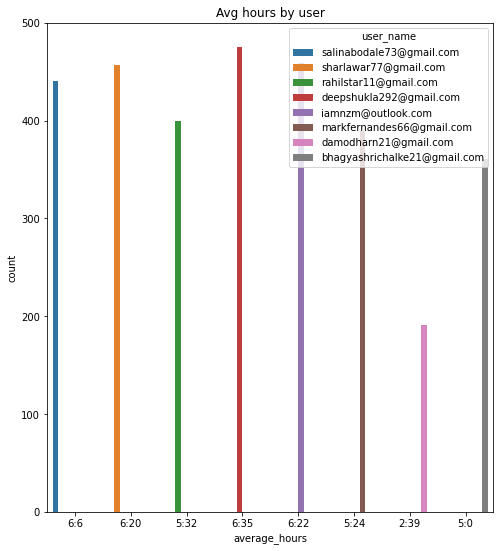

In [28]:
import seaborn as sns
pdf3 = highest_avg_hour.toPandas()
plt.figure(figsize = (8,9))
sns.barplot(x = 'average_hours',y='count',data = pdf3,hue='user_name')
plt.title("Avg hours by user")
plt.ylim(0,500)
plt.show()

In [29]:
highest_avg_hour.createOrReplaceTempView("working_hour")

# Users with Maximum and Minimum Avg Working hrs

In [30]:
spark.sql("SELECT user_name as `user with highest avg hour`,average_hours  FROM working_hour WHERE average_hours = (SELECT MAX(average_hours) FROM working_hour)").show()

+--------------------------+-------------+
|user with highest avg hour|average_hours|
+--------------------------+-------------+
|      salinabodale73@gm...|          6:6|
+--------------------------+-------------+



In [31]:
spark.sql("SELECT user_name as `user with lowest avg hour`,average_hours  FROM working_hour WHERE average_hours = (SELECT MIN(average_hours) FROM working_hour)").show()

+-------------------------+-------------+
|user with lowest avg hour|average_hours|
+-------------------------+-------------+
|     damodharn21@gmail...|         2:39|
+-------------------------+-------------+



# For the idle counts of user Mouse and Keyboard are 0.

In [32]:
df5=spark.sql("SELECT user_name FROM tbl_working_counts WHERE keyboard=0 and mouse=0").groupBy("user_name").count()
df5.show()

+--------------------+-----+
|           user_name|count|
+--------------------+-----+
|salinabodale73@gm...|  129|
|sharlawar77@gmail...|  123|
|rahilstar11@gmail...|  152|
|deepshukla292@gma...|   90|
|  iamnzm@outlook.com|  155|
|markfernandes66@g...|  119|
|damodharn21@gmail...|   62|
|bhagyashrichalke2...|  121|
+--------------------+-----+



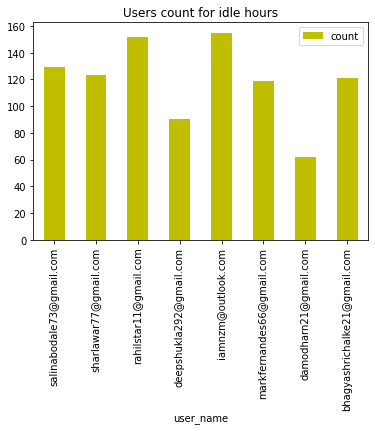

In [33]:
import matplotlib.pyplot as plt

try:
    pdf4=df5.toPandas()
    pdf4.plot.bar(x='user_name', y='count',color = 'y')
    plt.title("Users count for idle hours")
    plt.show()
except Exception as e:
    print(e)

In [34]:
df5.createOrReplaceTempView("idleHrs_by_user")
idle_sec=spark.sql("SELECT user_name,count,(count*5*60)/6 as avg_idle_seconds FROM idleHrs_by_user")
idle_sec.show()

+--------------------+-----+----------------+
|           user_name|count|avg_idle_seconds|
+--------------------+-----+----------------+
|salinabodale73@gm...|  129|          6450.0|
|sharlawar77@gmail...|  123|          6150.0|
|rahilstar11@gmail...|  152|          7600.0|
|deepshukla292@gma...|   90|          4500.0|
|  iamnzm@outlook.com|  155|          7750.0|
|markfernandes66@g...|  119|          5950.0|
|damodharn21@gmail...|   62|          3100.0|
|bhagyashrichalke2...|  121|          6050.0|
+--------------------+-----+----------------+



# Avg Idle Hours by User

In [35]:
idle_hours = idle_sec.withColumn("Avg_idle_hours", concat(
            floor(col("avg_idle_seconds") / 3600), lit(":"),
            floor((col("avg_idle_seconds") % 86400) % 3600 / 60), lit(""),
           
        )).drop("avg_idle_seconds")
idle_hours.show()

+--------------------+-----+--------------+
|           user_name|count|Avg_idle_hours|
+--------------------+-----+--------------+
|salinabodale73@gm...|  129|          1:47|
|sharlawar77@gmail...|  123|          1:42|
|rahilstar11@gmail...|  152|           2:6|
|deepshukla292@gma...|   90|          1:15|
|  iamnzm@outlook.com|  155|           2:9|
|markfernandes66@g...|  119|          1:39|
|damodharn21@gmail...|   62|          0:51|
|bhagyashrichalke2...|  121|          1:40|
+--------------------+-----+--------------+



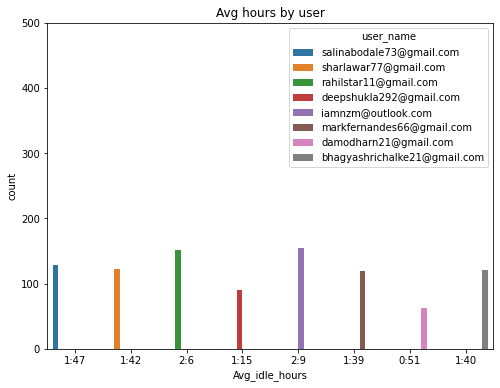

In [36]:
pdf5 = idle_hours.toPandas()
plt.figure(figsize = (8,6))
sns.barplot(x = 'Avg_idle_hours',y='count',data = pdf5,hue='user_name')
plt.title("Avg hours by user")
plt.ylim(0,500)
plt.show()

In [37]:
idle_hours.createOrReplaceTempView("idle_hrs_view")

## Getting User with Highest and lowest Idle Hours

In [38]:
spark.sql("SELECT user_name as `user with highest idle hour`,Avg_idle_hours  FROM idle_hrs_view WHERE Avg_idle_hours = (SELECT MAX(Avg_idle_hours) FROM idle_hrs_view)").show()

+---------------------------+--------------+
|user with highest idle hour|Avg_idle_hours|
+---------------------------+--------------+
|         iamnzm@outlook.com|           2:9|
+---------------------------+--------------+



In [39]:
spark.sql("SELECT user_name as `user with lowest idle hour`,Avg_idle_hours  FROM idle_hrs_view WHERE Avg_idle_hours = (SELECT MIN(Avg_idle_hours) FROM idle_hrs_view)").show()

+--------------------------+--------------+
|user with lowest idle hour|Avg_idle_hours|
+--------------------------+--------------+
|      damodharn21@gmail...|          0:51|
+--------------------------+--------------+



## Loading PySpark DataFrames to MySql Database

In [ ]:
import 